In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras

2024-05-20 22:37:18.314339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

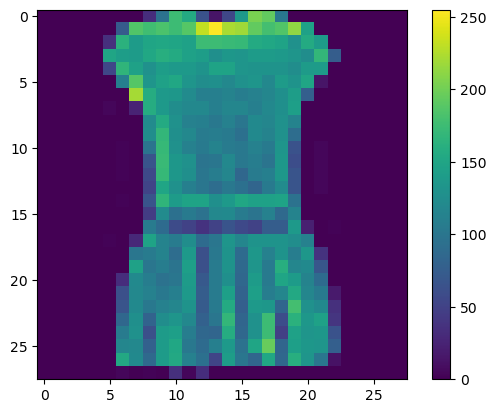

In [5]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(135, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
mod=model.fit(train_images, train_labels, epochs=20,batch_size=128,callbacks=[tensorboard_callback])

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 7.6425 - accuracy: 0.7407
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 1.0463 - accuracy: 0.7644
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.6289 - accuracy: 0.7953
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 0.5441 - accuracy: 0.8167
Epoch 5/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4964 - accuracy: 0.8288
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4622 - accuracy: 0.8396
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4372 - accuracy: 0.8466
Epoch 8/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4230 - accuracy: 0.8502
Epoch 9/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4143 - accuracy: 0.8529
Epoch 10/20
469/469 [==============================] - 11s 24ms/step - loss: 0.405

<AxesSubplot:>

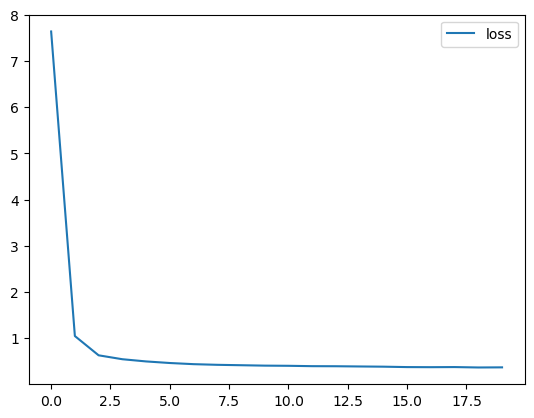

In [16]:
loss_df = pd.DataFrame(mod.history)

loss_df.loc[:,['loss']].plot()

<AxesSubplot:>

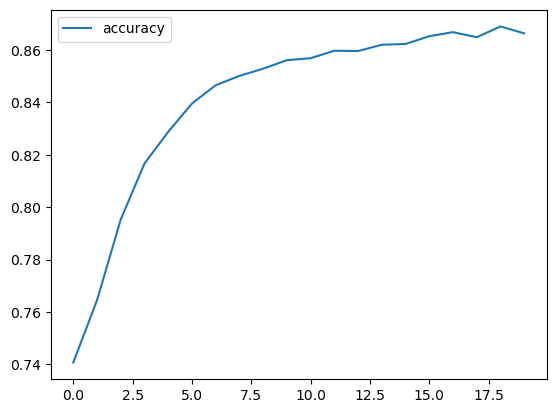

In [17]:
acc_df = pd.DataFrame(mod.history)

acc_df.loc[:,['accuracy']].plot()